In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Task 1: Exploratory Data Analysis (EDA) and Business Insights


In [1]:
import pandas as pd

# Load the datasets
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

In [3]:
# Check the first few rows of each dataset
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())



  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
# Check for missing values
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
# Check data types
print(customers_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [7]:
print(products_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [8]:
print(transactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


 Merge DataFrames for Comprehensive Analysis


In [9]:
# Merge transactions with customers and products
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left')
merged_df = merged_df.merge(products_df, on='ProductID', how='left')

Analyze Customer Demographics



Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


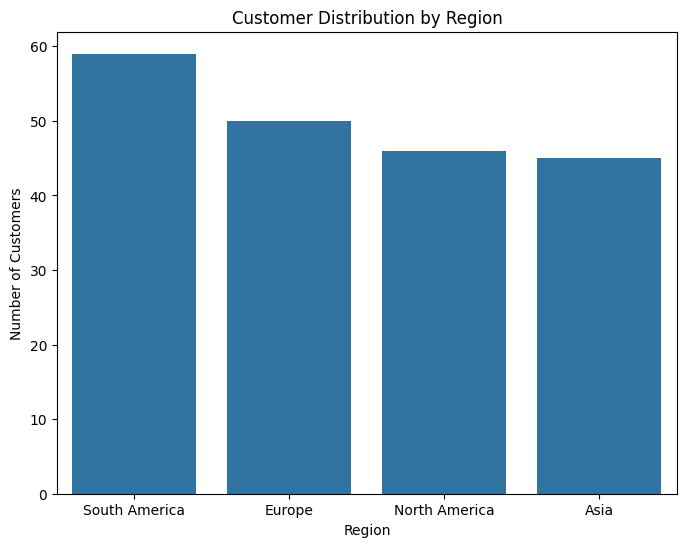

In [15]:
# Distribution of customers by region
region_distribution = customers_df['Region'].value_counts()
print(region_distribution)

# Plot the distribution of customers by region
plt.figure(figsize=(8, 6))
sns.barplot(x=region_distribution.index, y=region_distribution.values)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

Analyze Product Sales


ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


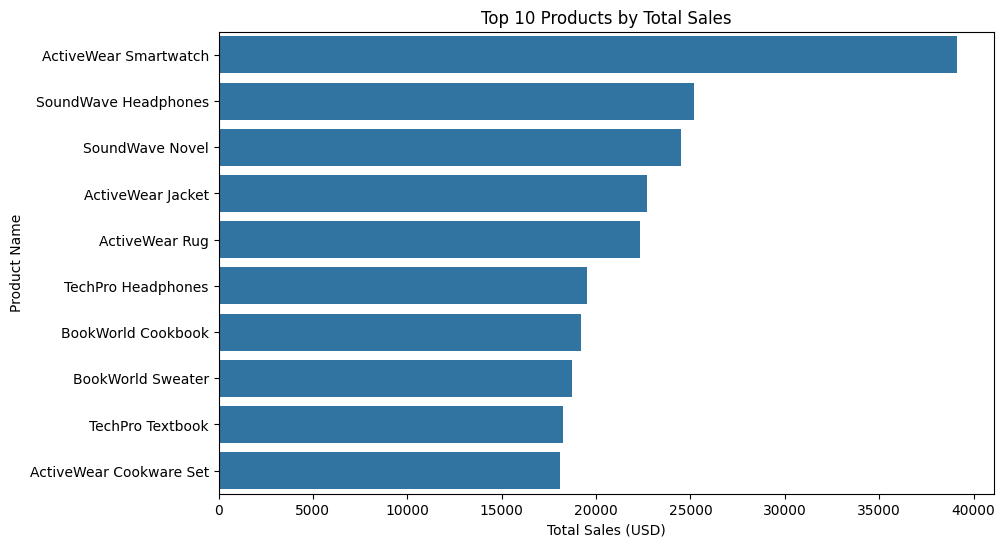

In [16]:
# Top 10 products by total sales
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().nlargest(10)
print(top_products)

# Plot the top 10 products by total sales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Name')
plt.show()

Analyze Transaction Patterns

TransactionMonth
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: TransactionID, dtype: int64


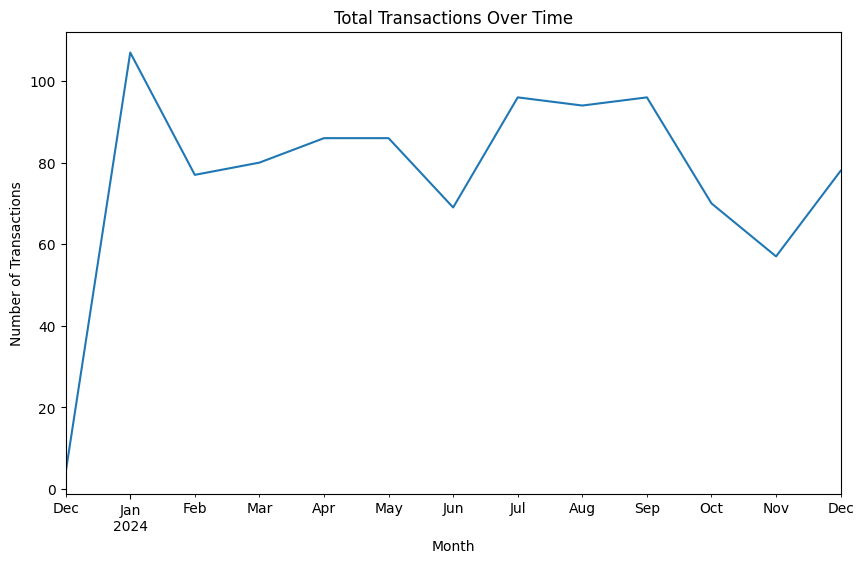

TransactionMonth
2023-12    942.380000
2024-01    620.340093
2024-02    668.302208
2024-03    597.859125
2024-04    668.826279
2024-05    750.322558
2024-06    706.828696
2024-07    743.399896
2024-08    674.858936
2024-09    735.455729
2024-10    672.331714
2024-11    670.602982
2024-12    757.041026
Freq: M, Name: TotalValue, dtype: float64


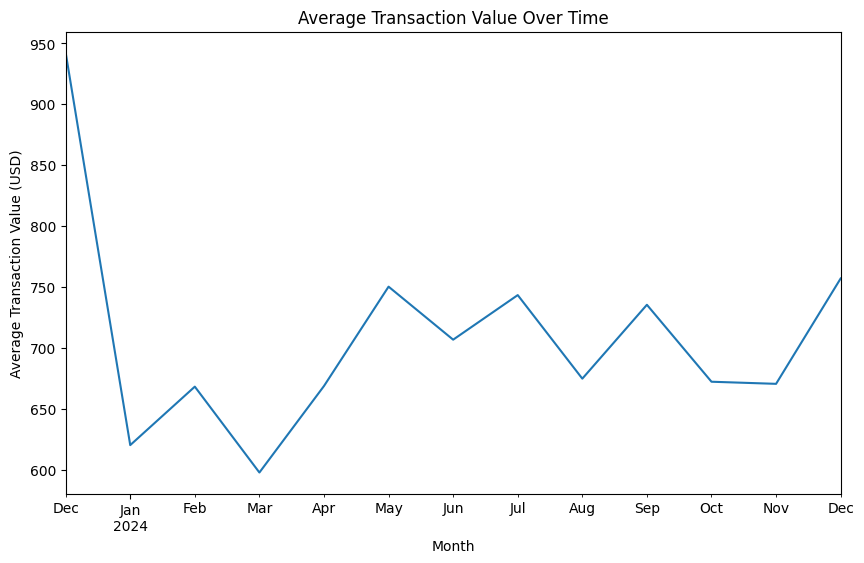

In [17]:
# Total transactions over time
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_transactions = merged_df.groupby('TransactionMonth')['TransactionID'].count()
print(monthly_transactions)

# Plot the total transactions over time
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line')
plt.title('Total Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Average transaction value over time
monthly_avg_transaction_value = merged_df.groupby('TransactionMonth')['TotalValue'].mean()
print(monthly_avg_transaction_value)

# Plot the average transaction value over time
plt.figure(figsize=(10, 6))
monthly_avg_transaction_value.plot(kind='line')
plt.title('Average Transaction Value Over Time')
plt.xlabel('Month')
plt.ylabel('Average Transaction Value (USD)')
plt.show()

Customer Lifetime Value (CLV) by Region

Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


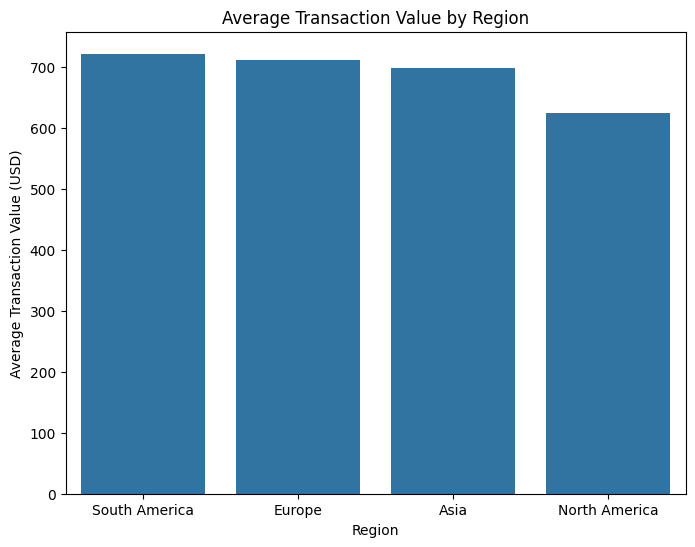

In [22]:
# Calculate average transaction value by region
avg_transaction_by_region = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
print(avg_transaction_by_region)

# Plot the average transaction value by region
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_transaction_by_region.index, y=avg_transaction_by_region.values)
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.show()

Seasonal Trends in Product Sales

Category             Books  Clothing  Electronics  Home Decor
TransactionMonth                                             
2023-12                NaN   1585.36      1870.24      313.92
2024-01           17515.05  17984.46     16786.31    14090.57
2024-02           21073.17   8091.81      8556.44    13737.85
2024-03            9091.55   7520.12     15383.29    15833.77
2024-04           11270.08  14454.24     18390.58    13404.16
2024-05           21793.32  17236.32     12244.79    13253.31
2024-06           16270.05  13217.41      9430.18     9853.54
2024-07           18501.32  16616.25     22096.51    14152.31
2024-08           18778.53  14436.85     18214.34    12007.02
2024-09           15454.39  18906.19     21703.48    14539.69
2024-10           13438.32  12093.82     12781.45     8749.63
2024-11           10556.56  11983.40     11275.89     4408.52
2024-12           18405.13  12044.43     12050.00    16549.64


<Figure size 1200x600 with 0 Axes>

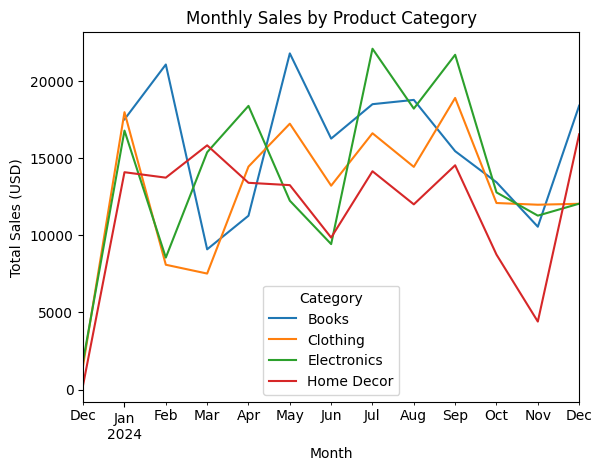

In [23]:
# Calculate monthly sales by product category
monthly_sales_by_category = merged_df.groupby(['TransactionMonth', 'Category'])['TotalValue'].sum().unstack()
print(monthly_sales_by_category)
# Plot monthly sales by product category
plt.figure(figsize=(12, 6))
monthly_sales_by_category.plot(kind='line')
plt.title('Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Category')
plt.show()

Sales by Product Category

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


<ipython-input-24-637890778c25>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='plasma')


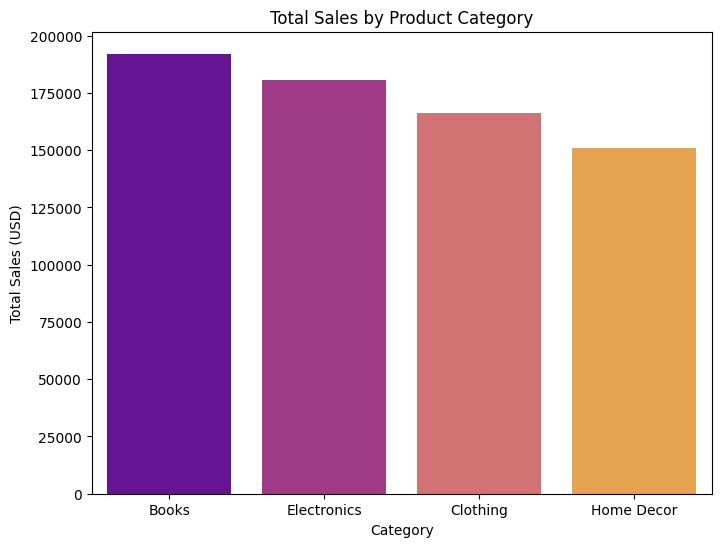

In [24]:
# Sales by product category
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_sales)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='plasma')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.show()

 Monthly Transaction Trends

TransactionMonth
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: TransactionID, dtype: int64


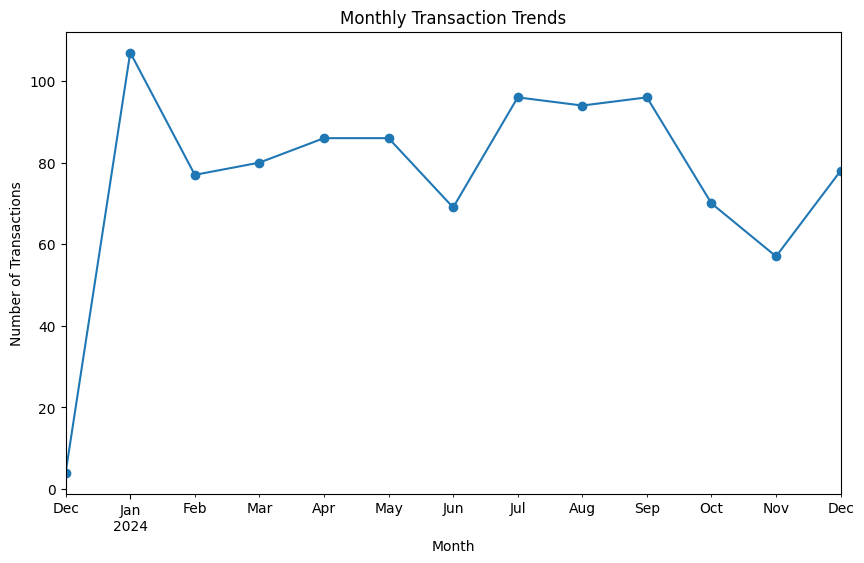

In [25]:
# Monthly transaction count
monthly_transactions = merged_df.groupby('TransactionMonth')['TransactionID'].count()
print(monthly_transactions)
# Plot
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line', marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()